In [1075]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn
import statsmodels.formula.api as smf

from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# ANALISIS EXPLORATORIO SOBRE UN BANCO.
* Creamos un mapa y empezar a encontrar las respuestas a las preguntas planteadas que nos podria hacer dicha empresa (en este caso un banco).


* ¿Que perfil tienen nuestros clientes con mayor potencial de inversion y adquirieron el producto?


* ¿Que modelo se ajusta mejor para predecir un cliente con gran potencial de adquirir el producto?
    * Creamos un modelo predictorio con las mejores variables a ponderar para saber que clase de clientes tiene puede adquirir dicho producto
------

In [888]:
data = pd.read_csv("Datasets/bank.csv",sep=";") 
data.head()
#4119 FILAS - 21 COLUMNAS

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# Creamos unos graficos generales para entender un poco mejor los datos que son de tipo Object.

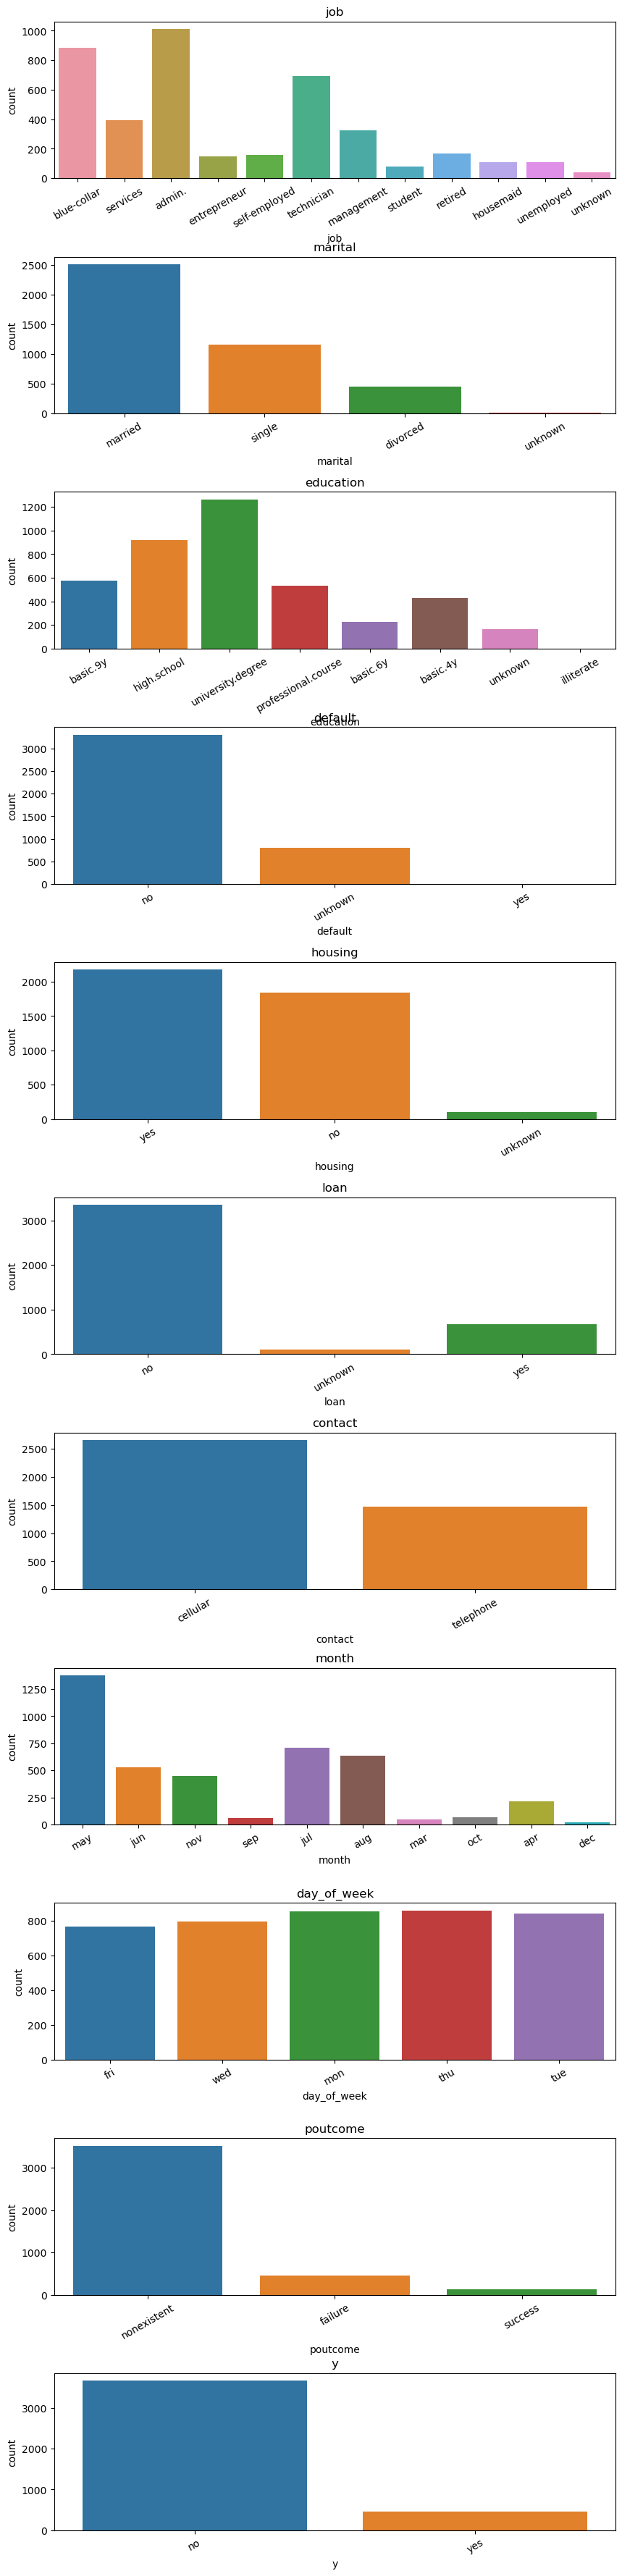

In [890]:
col_cat = ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]

fig,  ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

* **job =** tipo de trabajo (contiene 12 tipos de trabajos y la mayoria esta ubicada en administracion).
* **marital =** Contiene 4 tipos de datos(casado,divorciado,soltero,dato desconocido). 
* **education =** Niveles de educacion (contiene 8 tipos de educacion) el mayor es el titulo universitario.
* **default =** Paga o no sus deudas a tiempo (si,no y dato desconocido) La gran mayoria tiene valor "No".
* **Housing =** Si tiene credito hipotecario (Si,No y Deconocido). Esta balanceado entre el Si y No.
* **Loan =** Credito de consumo (si, no y desconocido) la gran mayoria contiene valores "No".
* **Contact =** Como fue contacada (celular o telefono) Hay una leve diferencia que fue mas por Celular.
* **Month =** Mes en cual fue contactado el cliente (la mayor camapaña parece ser en Mayo).
* **Day of Week =** Dia de la semana en cual fue contactado el cliente (tienen todos valores similares).
* **Poutcome =** Resultado de la campaña creada por el banco(el mayor valor esta en Inexistente).
* **Y =** adquirieron el producto o no.

### Observacion
* Podemos observar que hay varios tipos de educacion basica y simplificaremos en unirlas en una solo tipo de dato Gral.
* Lo que vamos a hacer es usar algunas columnas para saber cual es el perfil del cliente con mas potencial de adiquisición del prdocuto.

----

In [891]:
#Observamos los valores unicos que tiene "education"
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [892]:
data["education"] = np.where(data["education"] == "basic.4y" , "Basic" , data["education"])
data["education"] = np.where(data["education"] == "basic.6y" , "Basic" , data["education"])
data["education"] = np.where(data["education"] == "basic.9y" , "Basic" , data["education"])
data["education"].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [893]:
data.drop(columns=["contact","day_of_week","previous","duration","cons.price.idx","nr.employed","pdays"], inplace=True)

In [894]:
data.head()

,age,job,marital,education,default,housing,loan,month,campaign,poutcome,emp.var.rate,cons.conf.idx,euribor3m,y
0,30,blue-collar,married,Basic,no,yes,no,may,2,nonexistent,-1.8,-46.2,1.313,no
1,39,services,single,high.school,no,no,no,may,4,nonexistent,1.1,-36.4,4.855,no
2,25,services,married,high.school,no,yes,no,jun,1,nonexistent,1.4,-41.8,4.962,no
3,38,services,married,Basic,no,unknown,unknown,jun,3,nonexistent,1.4,-41.8,4.959,no
4,47,admin.,married,university.degree,no,yes,no,nov,1,nonexistent,-0.1,-42.0,4.191,no


In [895]:
data.describe()

,age,campaign,emp.var.rate,cons.conf.idx,euribor3m
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,2.537266,0.084972,-40.499102,3.621356
std,10.313362,2.568159,1.563114,4.594578,1.733591
min,18.000000,1.000000,-3.400000,-50.800000,0.635000
25%,32.000000,1.000000,-1.800000,-42.700000,1.334000
50%,38.000000,2.000000,1.100000,-41.800000,4.857000
75%,47.000000,3.000000,1.400000,-36.400000,4.961000
max,88.000000,35.000000,1.400000,-26.900000,5.045000


* **emp.var.rate:** tasa de variación del empleo - indicador trimestral (numérico)
* **cons.conf.idx:** índice de confianza del consumidor - indicador mensual (numérico)
* **euribor3m:** tasa euribor 3 meses - indicador diario (numérico)
    * **euribor** es el tipo de interes que pagan los bancos en la zona de "euros".Es el precio que los bancos ponen al dinero como en un mercado y se calcula a diario haciendo la media de los tipos de ineres de los bancos mas activos en "zona euro"
----

# Cambiaremos algunos nombres para que se puedan enteder mejor.

In [896]:
data = data.rename(columns={"emp.var.rate":"tasa_var_empl"})
data = data.rename(columns={"cons.conf.idx":"ind_conf"})

data.head()

,age,job,marital,education,default,housing,loan,month,campaign,poutcome,tasa_var_empl,ind_conf,euribor3m,y
0,30,blue-collar,married,Basic,no,yes,no,may,2,nonexistent,-1.8,-46.2,1.313,no
1,39,services,single,high.school,no,no,no,may,4,nonexistent,1.1,-36.4,4.855,no
2,25,services,married,high.school,no,yes,no,jun,1,nonexistent,1.4,-41.8,4.962,no
3,38,services,married,Basic,no,unknown,unknown,jun,3,nonexistent,1.4,-41.8,4.959,no
4,47,admin.,married,university.degree,no,yes,no,nov,1,nonexistent,-0.1,-42.0,4.191,no


* Cambiamos a forma de Numeros la columna "Y".  
yes = 1 . No = 0

# Creamos una grafica de los datos numericos que tenemos del dataset 

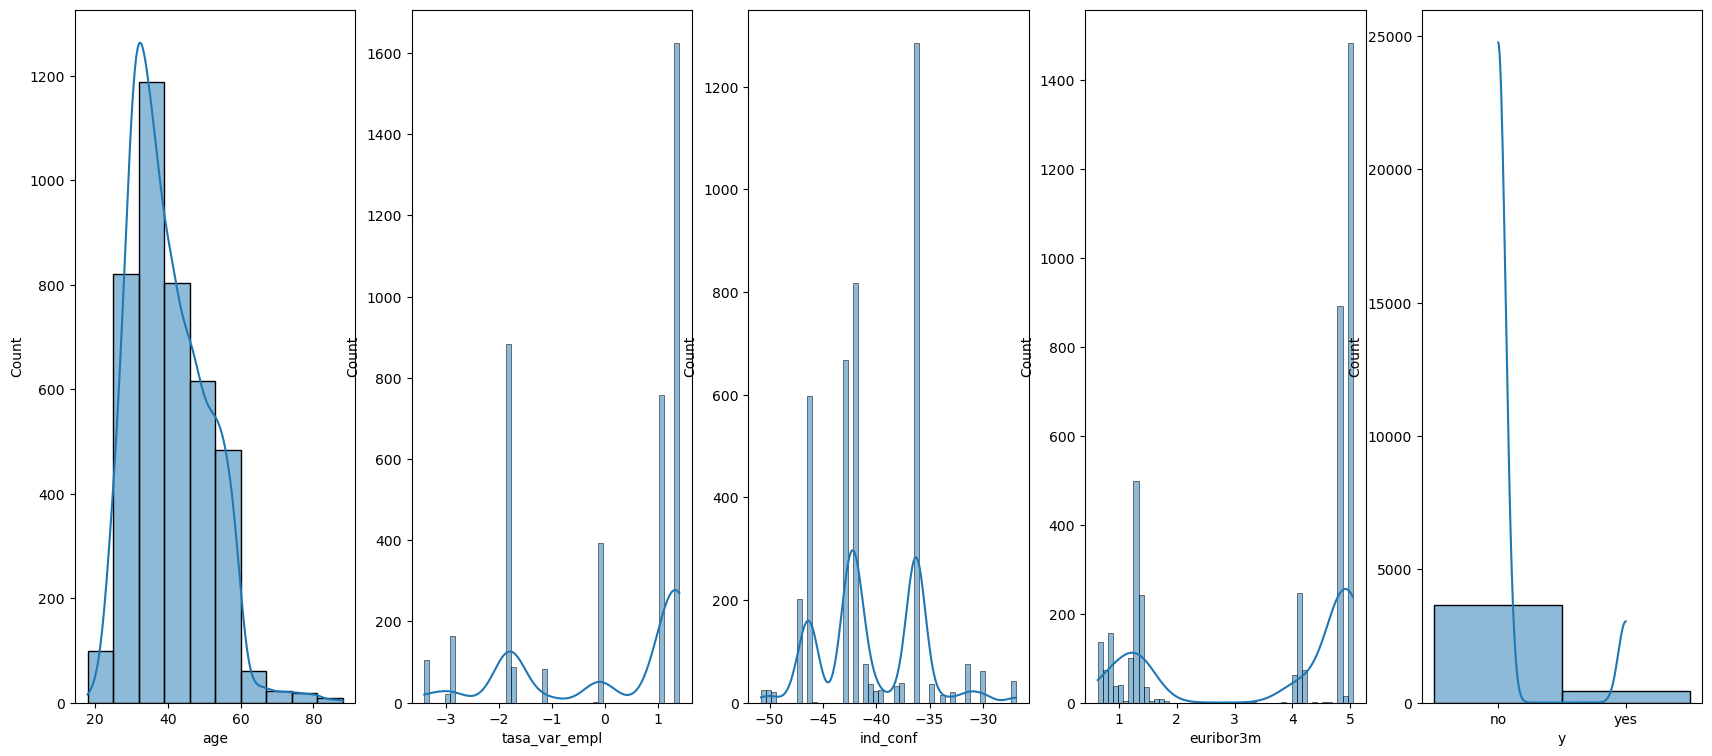

In [900]:
col_num = ["age","tasa_var_empl","ind_conf","euribor3m","y"]

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(21,9))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == "age":
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i] , bins=nbins , kde =True)
    ax[i].set_title

* **Observaciones:**
    * la mayor parte del grupo que fue contactado en la campaña tienen entre 30 y 50 años con un sesgo mas alto entre 30-40 años
    * Podemos observar tambien que el indice de confianza es muy negativo en gral.
    * Se puede observar y confirmar que la gente que compro el producto es alrededor de 500 personas.
    * la mayor parte de los clientes cuentan con el euribor3m en 1.5 y 5 pts
    
-----
----
# Viendo algunas caracteristicas en gral de cada dato, ahora analizaremos si existe alguna relacion entre las posibles variables predictoras. 

* **la variable a predecir sera la columna(y) que es el dato de di adquirio el producto o no.**

In [767]:
dic = {"yes":1, "no":0}
binario = data["y"].map(dic)
data["y_bin"] =binario

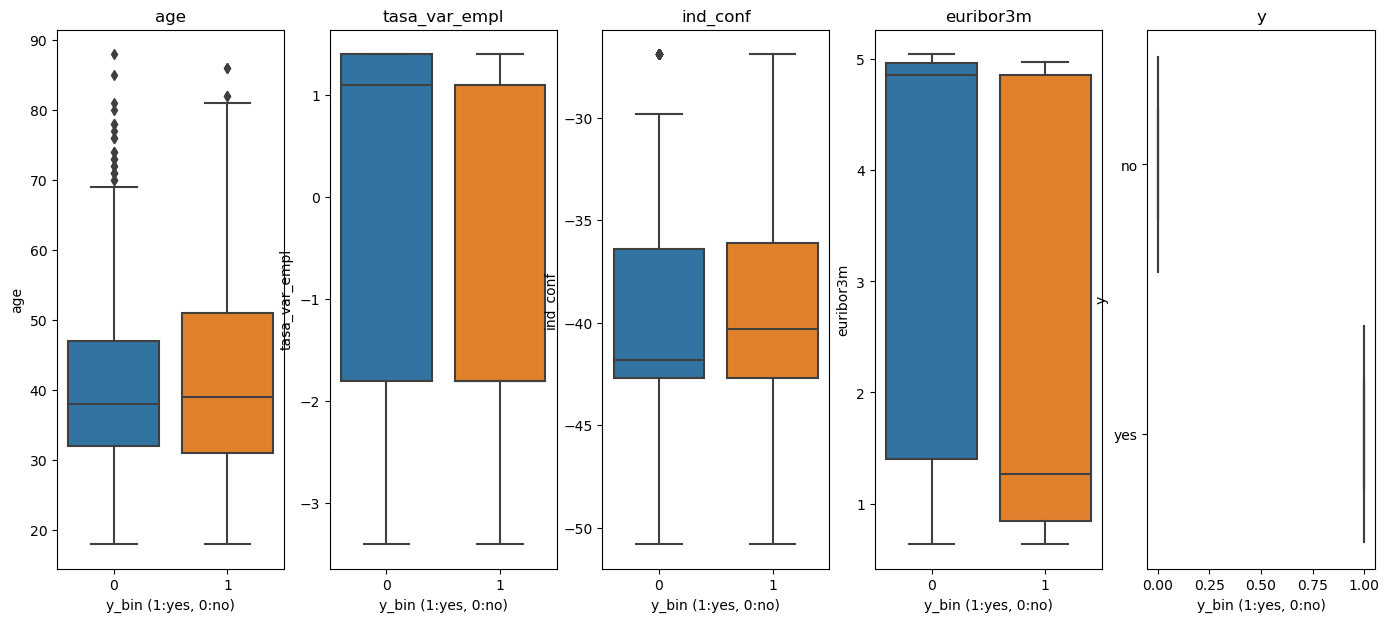

In [768]:
#Este anlisis es con ls variables NUMERICAS

fig,ax= plt.subplots(nrows=1, ncols=5, figsize=(17,7))
fig.subplots_adjust(hspace=.35)

for i, col in enumerate (col_num):
    bplt = sns.boxplot(x="y_bin",y=col,data=data, ax=ax[i])
    ax[i].set_xlabel("y_bin (1:yes, 0:no)")
    ax[i].set_title(col)

**Observaciones:**
* Vemos que en los rangos de las edades cambia apenas un poco los que obtuvieron el producto y los que no, La mediana es de 40 años aprox
* vemos que tanto **tasa_var_empl, ind_conf** no son en principio buenas variables predictivas. También observamos en GRAL que no son muy buenas las variables numericas en si para hacer un buen predictor.
* Pero si podemos ver que en el euribor3m la mediana del SI es de 1 y la del NO es 5 (Esta si es buena variable predictora)

-----

# Creamos una funcion para graficar tasas de conversión.
* Es decir convertir los clientes que adquirieron el producto y ver si tienen diferencias entre si, para luego ver cual es buena variable y poder usarla en la prediccion que haremos al final.


In [769]:
def graficar_tasas_conversion(var_predictora , var_predecir, type="line", order=None):
    x,y = var_predictora ,  var_predecir
    
    #generar agrupaciones,caclulcar tasa, multiplicar el % por 100 
    grupo= data.groupby(x)[y].mean().mul(100).rename("tasa_conv").reset_index()
    
    if type=="line":
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y="tasa_conv", data=grupo)
        plt.grid()
    elif type=="bar":
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y="tasa_conv", data=grupo, order=order)
        plt.grid()
    elif type=="scatter":
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y="tasa_conv" , data=grupo)
        plt.grid()

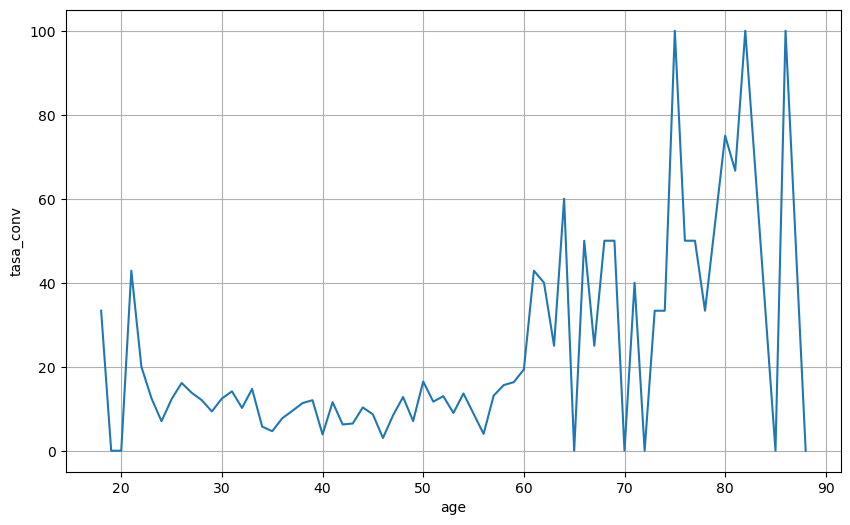

In [770]:
graficar_tasas_conversion("age","y_bin")

**AGE - observaciones:**
* Observamos diferencias en las tasas de conversión por edad. 
* Se podria establecer 3 tipos de rangos aproximados: 18-27 años, 28-59 y 60 años en adelante
-----

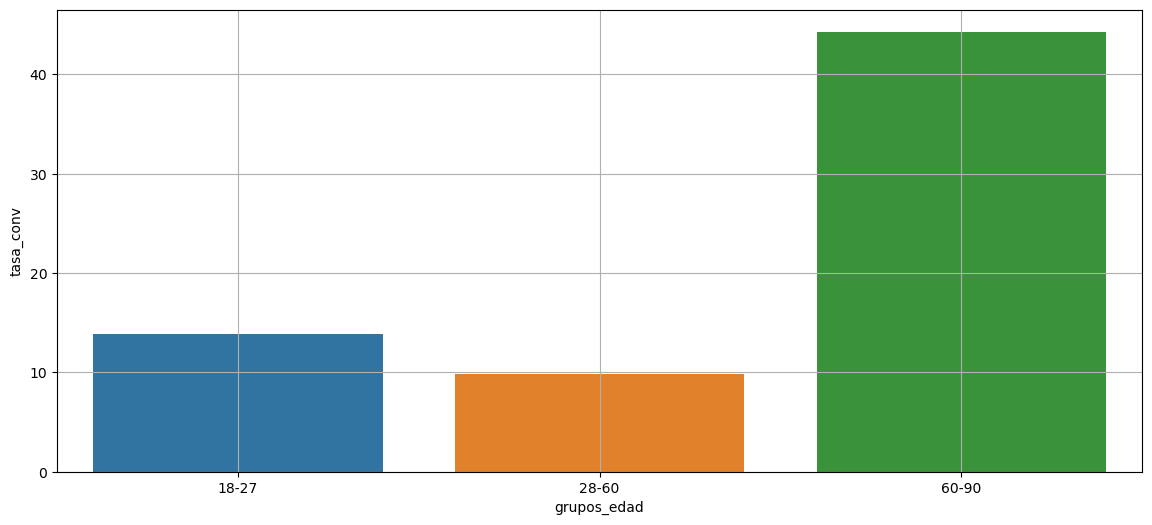

In [771]:
#Agregamos las columnas en el dataset de los grupos que se podrian dividir

data.loc[:,"grupos_edad"] ="18-27"
data.loc[data["age"]>60, "grupos_edad"] = "60-90"
data.loc[(data["age"]>28)&(data["age"]<59), "grupos_edad"] = "28-60"

#Graficamos
graficar_tasas_conversion("grupos_edad" , "y_bin", type="bar")

**GRUPOS EDAD - obersavaciones**
* Tenemos los 3 rangos de edad bastantes diferenciados con sus distintas tansas de conversión.
    * La tasa promedio del rango entre 18-27 años el promedio es de 14%
    * La tasa promedio del rango entre 28-60 años es casi del 10% (es la menor)
    * La tasa promedio desde 60 en adelante es del 45% (la mayor tasa de conversión)
* Buena variable predictora   

   ------

In [772]:
#Crearemos grupos como hicimos con la edada asi se nos hace mas entendible
#EURIBOR3M


data.loc[(data["euribor3m"]>=0) & (data["euribor3m"]<1), "grupos_euribor3m"] = "0-1"
data.loc[(data["euribor3m"]>=1) & (data["euribor3m"]<2), "grupos_euribor3m"] = "1-2"
data.loc[(data["euribor3m"]>=2) & (data["euribor3m"]<3), "grupos_euribor3m"] = "2-3"
data.loc[(data["euribor3m"]>=3) & (data["euribor3m"]<4), "grupos_euribor3m"] = "3-4"
data.loc[(data["euribor3m"]>=4) & (data["euribor3m"]<6), "grupos_euribor3m"] = "4-5"

data.head()

,age,job,marital,education,default,housing,loan,month,campaign,poutcome,tasa_var_empl,ind_conf,euribor3m,y,y_bin,grupos_edad,grupos_euribor3m
0,30,blue-collar,married,Basic,no,yes,no,may,2,nonexistent,-1.8,-46.2,1.313,no,0,28-60,1-2
1,39,services,single,high.school,no,no,no,may,4,nonexistent,1.1,-36.4,4.855,no,0,28-60,4-5
2,25,services,married,high.school,no,yes,no,jun,1,nonexistent,1.4,-41.8,4.962,no,0,18-27,4-5
3,38,services,married,Basic,no,unknown,unknown,jun,3,nonexistent,1.4,-41.8,4.959,no,0,28-60,4-5
4,47,admin.,married,university.degree,no,yes,no,nov,1,nonexistent,-0.1,-42.0,4.191,no,0,28-60,4-5


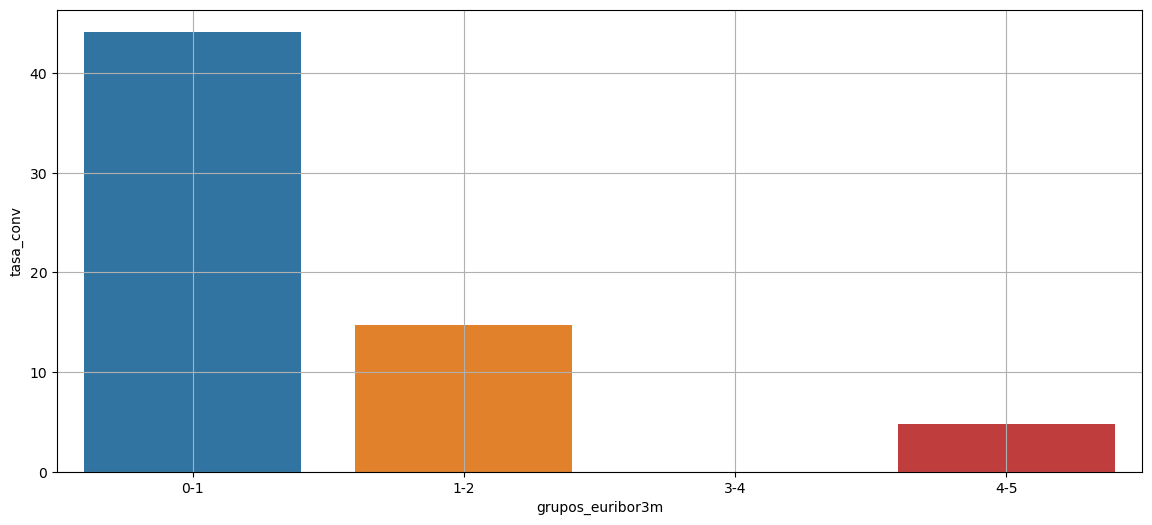

In [773]:
graficar_tasas_conversion("grupos_euribor3m" , "y_bin", type="bar")

**GRUPOS EURIBOR3M - observaciónes**
* podemos observar que que la gente que tiene un euribor3m entre 0 y 1 fue la que mas adquirio e invirtio con el banco con un 45%
* lo demas tienen una gran diferencia : 15% (1-2) y 5%(4-5) 
* Puede ser una buena variable predictora
----

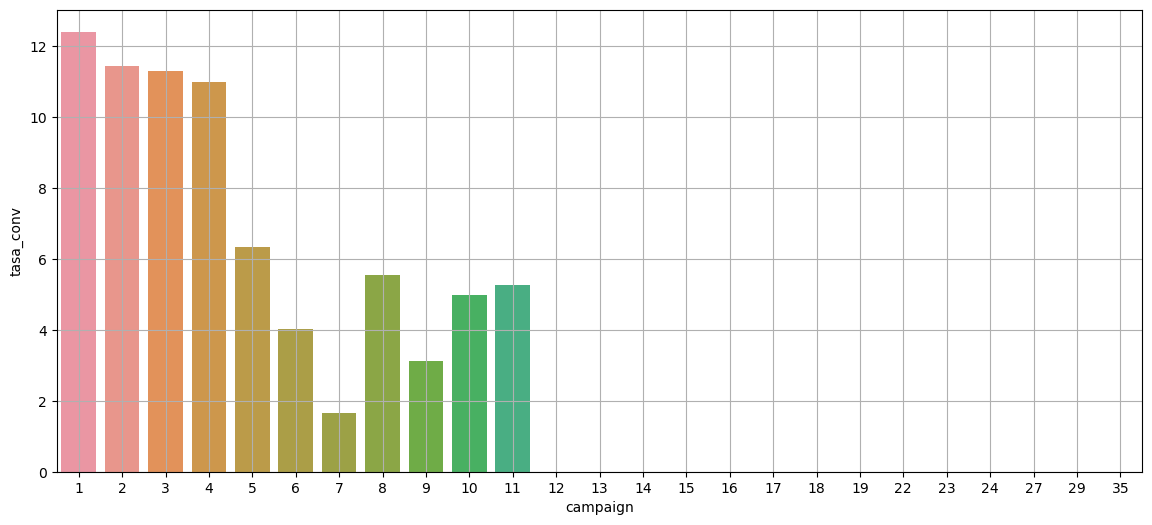

In [774]:
graficar_tasas_conversion("campaign" , "y_bin", type="bar")

**CAMPAIGN - observaciónes**
* Vemos que la campaña puede ser un buen predictor en si, se puede observar que adquirieron el producto a los clientes que tuvieron solamente entre 1 a 4 contactos (sea llamada, email o de cualquier forma virtual)
* **CAMPAIGN: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)**
----

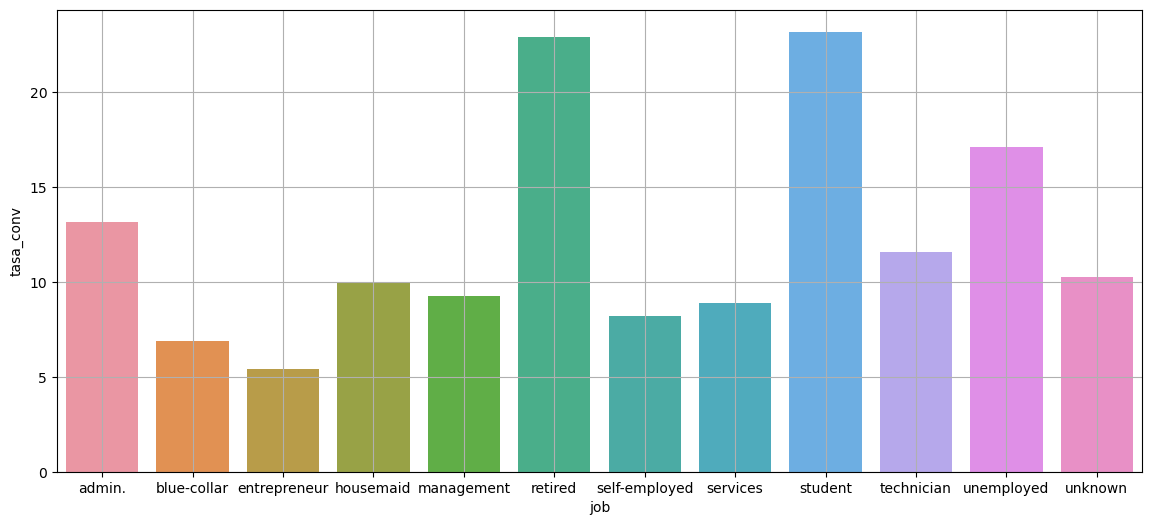

In [775]:
graficar_tasas_conversion("job" , "y_bin", type="bar")

**JOB - observaciónes**
* La tasa de conversión estan entre el 5% y el 25% aproximadamente.
* Vemos que los mayores porcentaje lo tienen los jubilados con el 25% junto con los estudiantes que también tienen el 25%.
* Luego vemos que le siguen los desempleados con el 17% y luego cargos de administrador 13%.
* LLegamos a la conclusion que "Job" puede ser una variable predictora
----

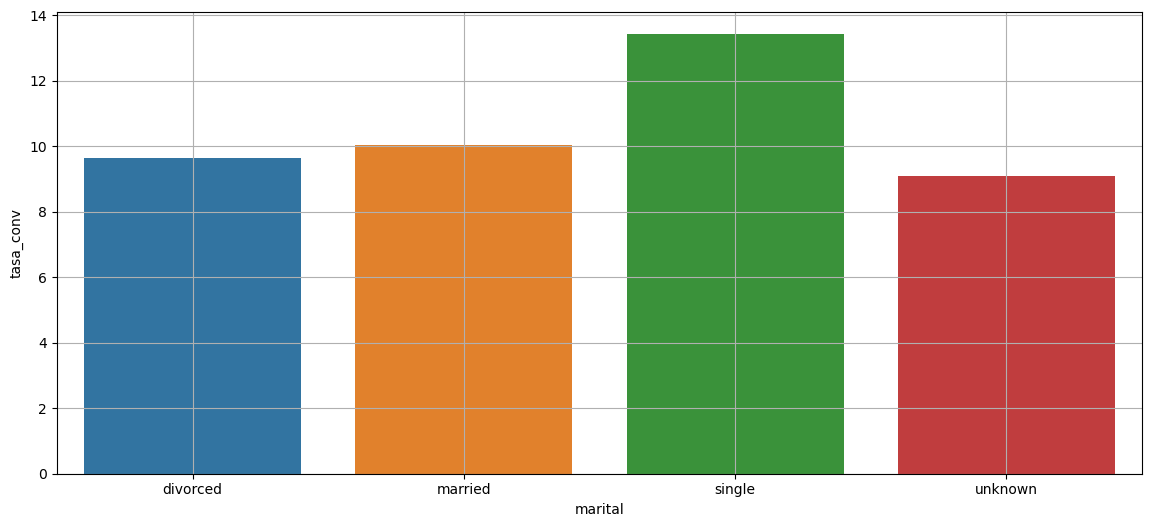

In [776]:
graficar_tasas_conversion("marital" , "y_bin", type="bar")

**MARITAL - observaciónes**
* Vemos que las personas solteras tienden a tener un porcentaje apenas mas alto en adquirir dicho producto con el casi 14%, pero las tasas de conversion son muy similares con las demas. No es un buen predictor.
----

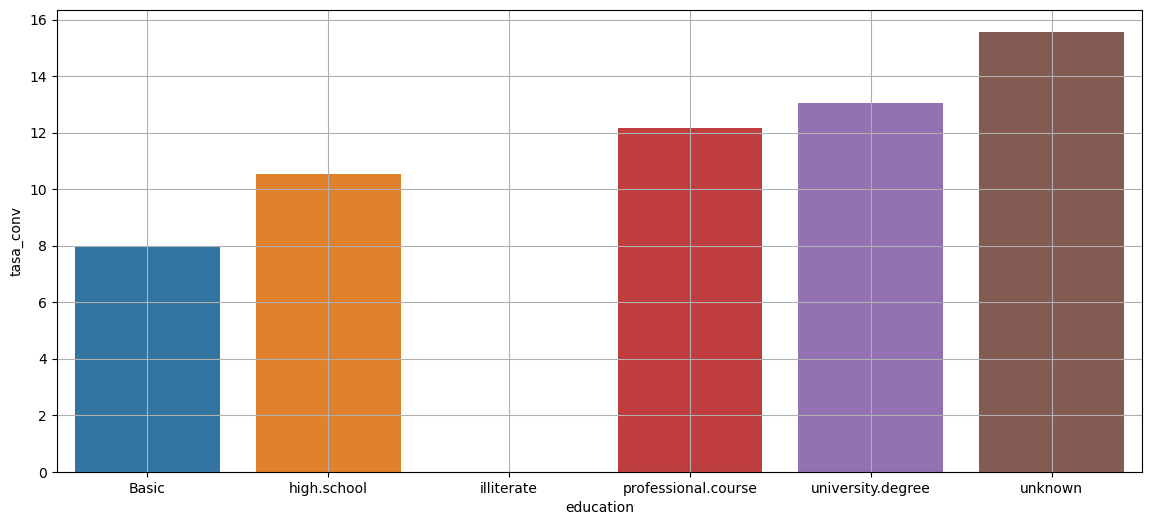

In [777]:
graficar_tasas_conversion("education" , "y_bin", type="bar")

**EDUCATION - observaciónes** 
* Podemos observar que a mayor nivel educativo la probabilidad de que adiquiera el producto es mayor.(en teoria esto es entendible por que si mayor es su nivel educativo mayor va a ser su poder adquisitivo)
* Puede ser una buena variable predictora.

------

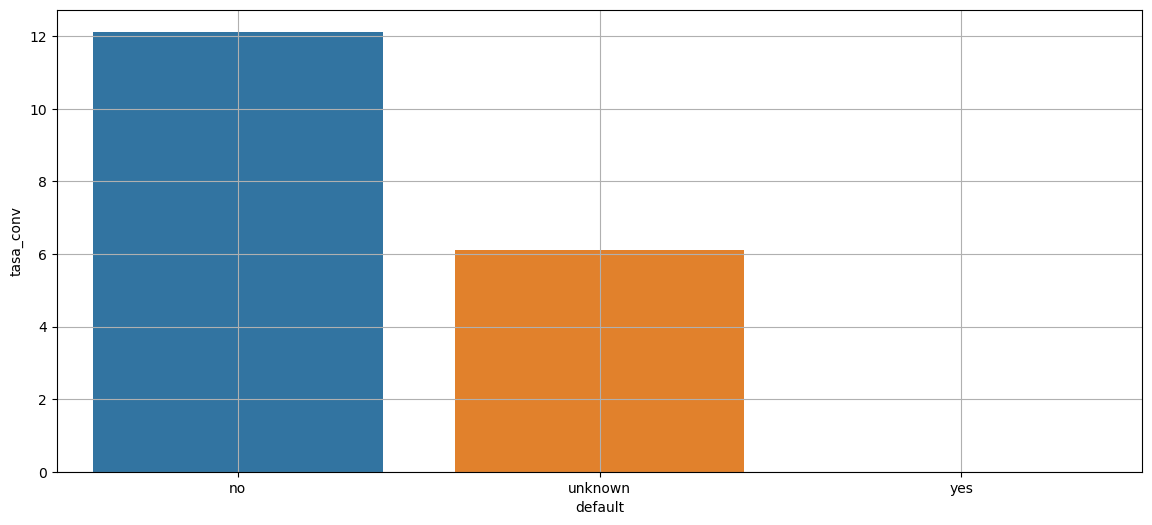

In [778]:
graficar_tasas_conversion("default" , "y_bin", type="bar")

**DEFAULT - observaciónes**
* Vemos que las personas que pagan sus deudas a tiempo tienen una tasa de conversion mucho mas alta de los que no pagan a tiempo. (en este dataset vemos que los que no pagan a tiempo directamente no adquirieron un prestamo).
* Ciertamente es una gran variable predictora.
-----

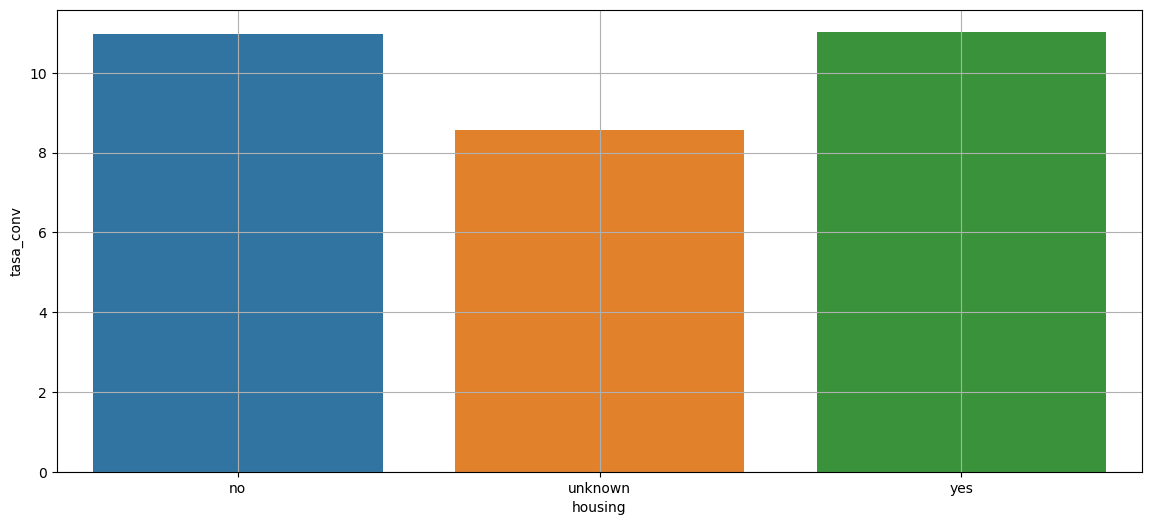

In [779]:
graficar_tasas_conversion("housing" , "y_bin", type="bar")

**HOUSING - observaciónes**
* son datos muy similares sobre la gente que tiene creditos hipotecarios. No es una buena variable predictora.

----

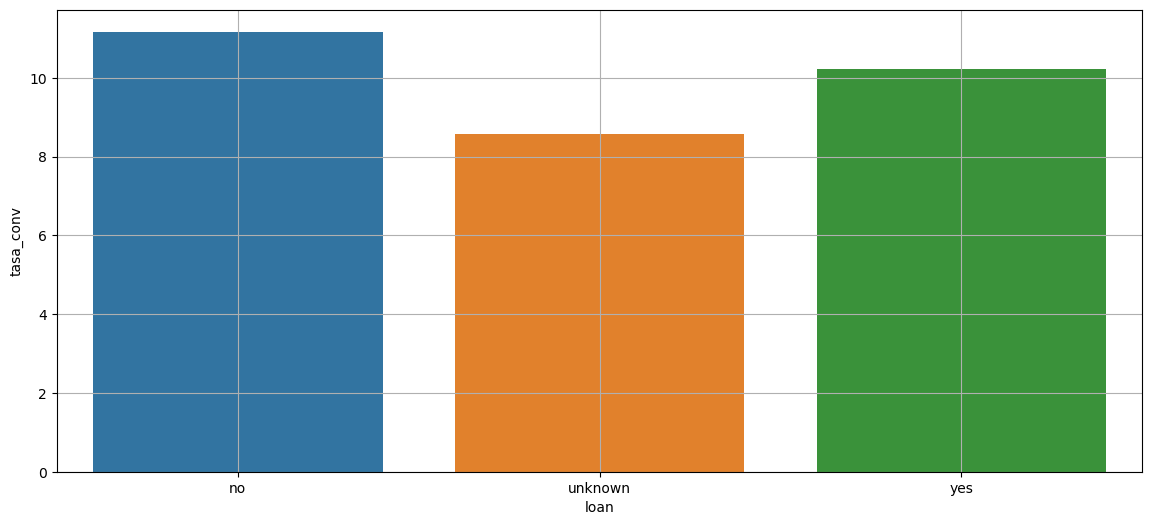

In [780]:
graficar_tasas_conversion("loan" , "y_bin", type="bar")

**LOAN - observaciónes**
* Se puede observar que es muy leve la diferencia de las personas que si tienen un credito de consumo con las que no y podemos observar también que tenemos muchos datos en blanco. por eso mismo no es una buena variable predictora
----

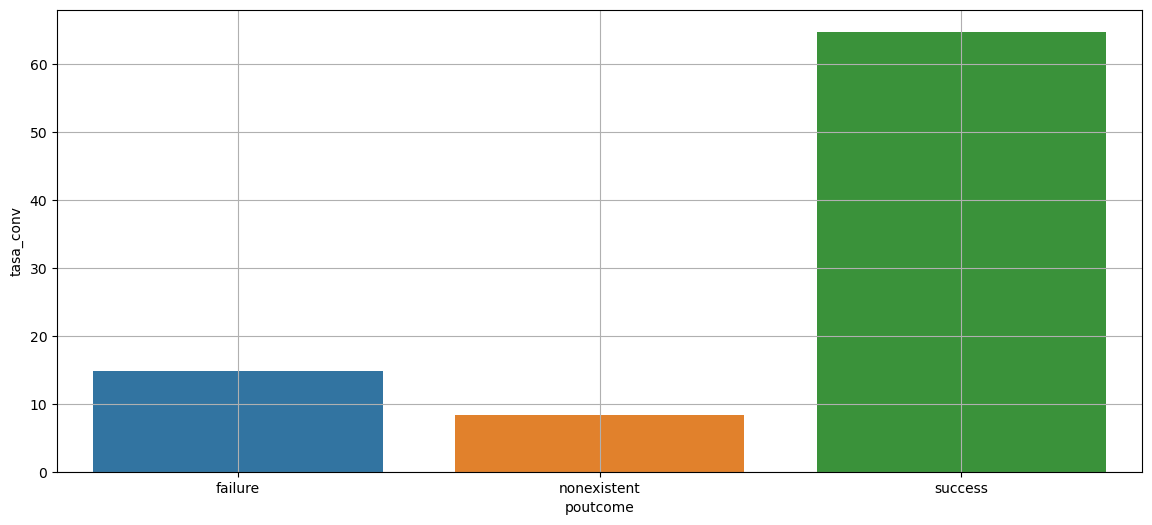

In [781]:
graficar_tasas_conversion("poutcome" , "y_bin", type="bar")

**POUTCOME - observaciónes**
* podemos ver que las personas que adquirieron el producto en la campaña anterior (poutcome = success) es mas probable que adquiera este nuevo producto con el banco. Tienen una diferencia muy grande: 65% Si y 15% No. 
* Es buena variable predictora
----

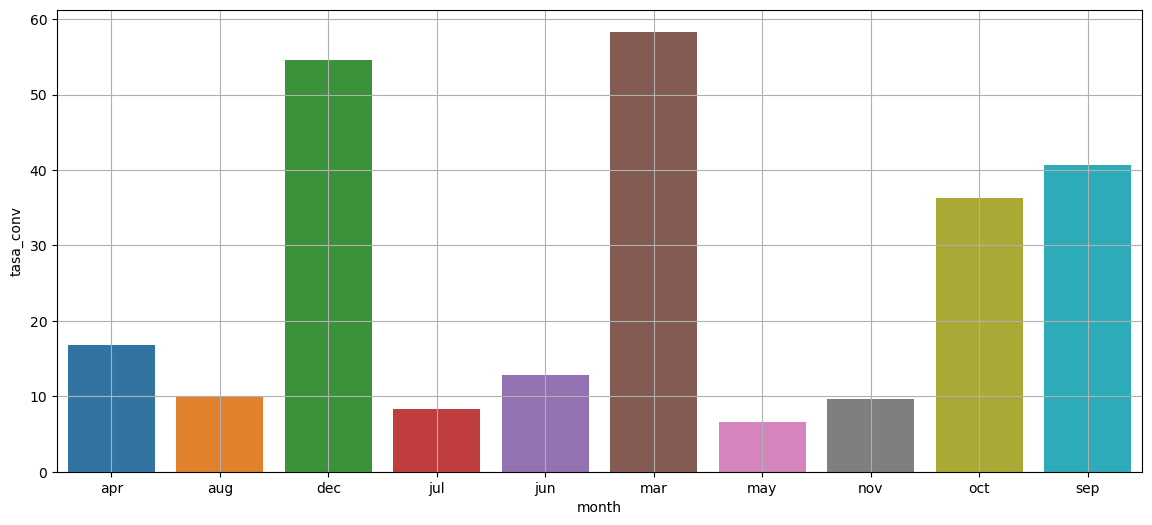

In [782]:
graficar_tasas_conversion("month" , "y_bin", type="bar")

**MONTH - observaciónes**
* Podemos ver que tenemos 4 meses en los cuales fueron "claves" para los que adquirieron el producto (diciembre, marzo, septiembre y octubre). Si es una buena variable predictora

----

# RESUMEN

* Las mejores variables predictoras con mayor impacto en la tasa de conversión parecieran ser:
    * 1 - POUTCOME: obtiene el 65% de conversión para el nivel "succes"
    * 2 - EDUCATION: mayor nivel de educacion, mayor es la tasa de conversión
    * 3 - AGE: La tasa de 60-90 en adelante es del 45% 
    * 4 - ERUIBOR3M: se observa que tambien es buena variable por que se lleva el 45% las personas entre un 0-1
    * 5 - DEFAULT: es una buena variable por que las personas que si tienen sus deudas pagadas a termino si adiquieren el nuevo producto
    * 6 - JOB - Los jubilados con el 25% junto con los estudiantes que también tienen el 25%.
    * 7 - CAMPAIGN - por lo visto el maximos de veces para ponerse en contacto con el cliente es alrededor de 4
    * 8 - MONTH - tenemos 4 meses en cuales fueron mas adquirido el producto en si

------
------

# Creamos 3 tipos de datasets
* para las variables numericas, de objetos y las Generales

In [783]:
data["default"] = (data["default"] == "yes").astype(int)

In [784]:
data_var = data[["age", "job","education","default","campaign","month","poutcome","euribor3m","y_bin","grupos_edad","grupos_euribor3m"]]
data_num = data[["age","default","campaign","euribor3m","y_bin"]]
data_obj = data[["job", "education","grupos_edad","grupos_euribor3m","y_bin"]]

data_var.head()

,age,job,education,default,campaign,month,poutcome,euribor3m,y_bin,grupos_edad,grupos_euribor3m
0,30,blue-collar,Basic,0,2,may,nonexistent,1.313,0,28-60,1-2
1,39,services,high.school,0,4,may,nonexistent,4.855,0,28-60,4-5
2,25,services,high.school,0,1,jun,nonexistent,4.962,0,18-27,4-5
3,38,services,Basic,0,3,jun,nonexistent,4.959,0,28-60,4-5
4,47,admin.,university.degree,0,1,nov,nonexistent,4.191,0,28-60,4-5



----
----
# PREDICCIONES...

----
-----
# REGRESION LINEAL CON VARIABLES CATEGORICAS

In [830]:
dummy_job = pd.get_dummies(data_var["job"] , prefix="job") 
dummy_education = pd.get_dummies(data_var["education"] , prefix="education")
dummy_edad = pd.get_dummies(data_var["grupos_edad"] , prefix="grupos_edad")
dummy_euribor3m = pd.get_dummies(data_var["grupos_euribor3m"] , prefix="grupos_euribor3m")
dummy_poutcome = pd.get_dummies(data_var["poutcome"], prefix="poutcome")
data_default = data_var["default"]
y_bin = data_var["y_bin"]

data_dummy1 = pd.concat([dummy_poutcome,dummy_edad,dummy_euribor3m,dummy_job,dummy_education,data_default,y_bin],axis=1 , sort=False)
data_dummy1.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success,grupos_edad_18-27,grupos_edad_28-60,grupos_edad_60-90,grupos_euribor3m_0-1,grupos_euribor3m_1-2,grupos_euribor3m_3-4,grupos_euribor3m_4-5,...,job_unemployed,job_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default,y_bin
0,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [801]:
X = data_dummy
Y = data_var["y_bin"]
#
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [802]:
print(lm.intercept_)
print(lm.coef_)

-1201784567270.6772
[-1.45670145e+12 -1.45670145e+12 -1.45670145e+12 -1.15572780e+12
 -1.15572780e+12 -1.15572780e+12 -1.33665816e+11 -1.33665816e+11
 -1.33665816e+11 -1.33665816e+11 -1.59286965e+11 -1.59286965e+11
 -1.59286965e+11 -1.59286965e+11 -1.59286965e+11 -1.59286965e+11
 -1.59286965e+11 -1.59286965e+11 -1.59286965e+11 -1.59286965e+11
 -1.59286965e+11 -1.59286965e+11  4.10716660e+12  4.10716660e+12
  4.10716660e+12  4.10716660e+12  4.10716660e+12  4.10716660e+12
 -3.91914519e-02]


In [803]:
lm.score(X,Y)

0.1835312685054824

**Observaciones**
* Vemos que el resultado del modelo es muy bajo, nos da un valor de 18% de efectividad.
---
---

# ARBOL DE REGRESION CON LAS VARIABLES CATEGORICAS DUMIFICADAS (las variables pasadas a valores numericos)

In [804]:
#IGNORAR LO DATOS NaN de los dummies
from sklearn.preprocessing import OneHotEncoder
oneh = OneHotEncoder(handle_unknown="ignore")

In [906]:
colname2 = data_dummy1.columns.values.tolist()
predictors2 = colname2[:]
target2 = colname2[29]

X = data_dummy1[predictors2]
Y = data_dummy1[target2]

In [907]:
regtree2 = DecisionTreeRegressor(min_samples_split=50, min_samples_leaf=50, max_depth=7)

In [908]:
regtree2.fit(X,Y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=50, min_samples_split=50)

In [909]:
preds3 = regtree2.predict(data_dummy1)

In [910]:
data_dummy1["preds"] = preds2
data_dummy1.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success,grupos_edad_18-27,grupos_edad_28-60,grupos_edad_60-90,grupos_euribor3m_0-1,grupos_euribor3m_1-2,grupos_euribor3m_3-4,grupos_euribor3m_4-5,...,job_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default,y_bin,preds
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.0
3,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0.0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0.0


In [911]:
crossval2 =KFold(n_splits=15, shuffle=True)
scores2  = cross_val_score(regtree2, X,Y,scoring ="neg_mean_squared_error" , cv=crossval2,
                        n_jobs=1)
print(scores2)
score = np.mean(scores2)
print(score)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
0.0


**Observaciones** 
* Vemos que no da una efectividad del 100% pero es de obviar por que solamente usa como dato predictorio la variable "Y". eso no es bueno y no sirve. Es como que copiara y pegase los datos. 

-----
-----
# ARBOL DE DECISION.Con variables categoricas dumificadas(pasadas a valores numericos).

In [1037]:
dummy_month = pd.get_dummies(data["month"] , prefix="month") 
#
y_ = data["y"]
dummy_camp = data["campaign"]

data_dummy4 = pd.concat([dummy_poutcome,dummy_edad,dummy_euribor3m,dummy_job,dummy_education,data_default,dummy_month,dummy_camp,y_],axis=1 , sort=False)

In [956]:
colnames4 = data_dummy4.columns.values.tolist()
predictors4 = colnames4[:40]
target4 = colnames4[40]

In [957]:
#datos para entrenar
data_dummy4["is_train"] = (np.random.uniform(0,1,len(data))<=0.75).astype(int)

In [958]:
train , test = data_dummy4[data_dummy4["is_train"]==True], data_dummy4[data_dummy4["is_train"] == False]

In [1028]:
#Creamos el arbol de decision.

tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=50,max_depth=150)
tree.fit(train[predictors4], train[target4])

DecisionTreeClassifier(criterion='entropy', max_depth=150, min_samples_split=50)

In [1029]:
preds4 = tree.predict(test[predictors4])

In [1030]:
pd.crosstab(test[target4], preds4,rownames=["actual"], colnames=["predictions"])

predictions,no,yes
actual,,
no,872,22
yes,95,27


**Observaciones**
* Aqui creamos una tabla de doble entrada para comparar el valor actual que hay en el Data Set **(clientes con sus respectivos datos VS la predicción que ha elaborado el modelo con el árbol de decisión).** la tabla se lee de la siguiente manera :
    * todos los clientes que tenian **NO**. 872 clientes fueron clasificados como **NO** y 22 como SI(erroneo).
    * Los Clientes que tenian clasificacion **SI**. 27 clientes fueron clasificados como **SI** y 95 como NO(erroneo).
* Es decir que 899 fueron muy bien clasificadas y 117 fueron "mal clasificadas".

-----

In [1035]:
tree.score(train[predictors4], train[target4])

0.9158878504672897

In [1034]:
tree.score(test[predictors4], test[target4])

0.8848425196850394

**Observaciones**
* **Lo que podemos ver es que tiene una taza de ACIERTOS elevada, bastante aceptable por que solo tiene un 9% de error. es decir que tiene un Acierto del 91%.**
* Podemos ver que en el proceso de **entrenamiento(train)** tuvo un acierto del 91,58%
* Se puede ver que también en el proceso de **Testeo(test)** tuvo un acierto del 88,48%
    * se observav que es muy buen predictor el arbol de decision usando las variables indicadas.
    
----
* Aqui dejaremos el grafico de como se comporto el arbol.

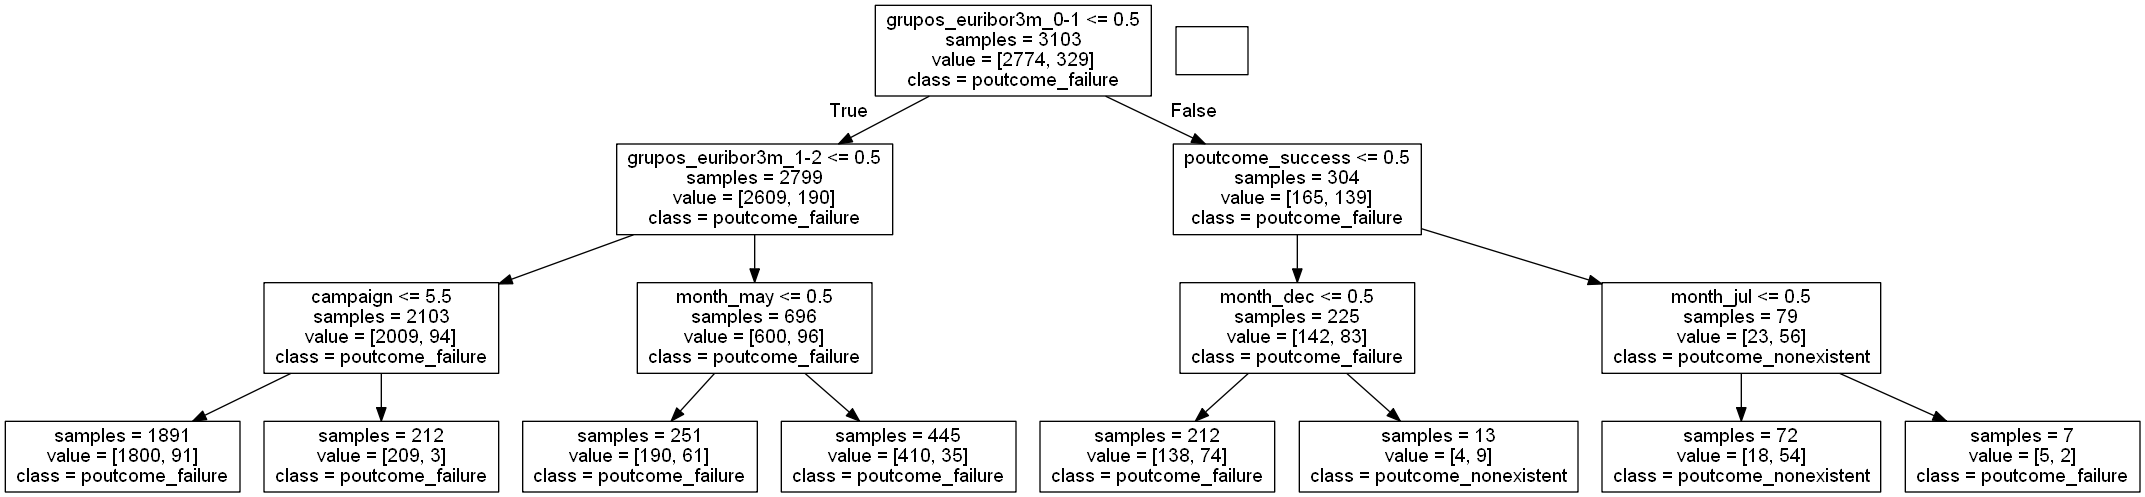

In [1007]:
export_graphviz(tree, out_file="arbol_decision_banco", class_names=predictors4, feature_names = predictors4,
               impurity=False)

(graph,) = pydot.graph_from_dot_file("../MisTrabajos/arbol_decision_banco")
graph.write_png("../MisTrabajos/arbol_decision_banco")

im = Image.open("../MisTrabajos/arbol_decision_banco")
im

## Haremos una validacion cruzada para ver como se comporta el modelo creado. 
* lo que hacemos es evaluar los resultados estadisticos del analisis creado. Mas que nada para garantizar que son independientes de la partición entre datos de entrenamiento y prueba (lo que hace es "entrecruzar" los datos obetenidos para ver si su comportamiento es el mismo)

In [1056]:
X = data_dummy4[predictors4]
Y = data_dummy4[target4]

tree4 = DecisionTreeClassifier(criterion="entropy" , max_depth=10,  min_samples_split=50, random_state=42)
tree4.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=50,
                       random_state=42)

In [1067]:
cv4 = KFold(n_splits=15, shuffle=True, random_state=42)
score4 =np.mean(cross_val_score(tree,X,Y,scoring="accuracy", cv=cv4 , n_jobs=1))
score4

0.8965759787657599

**Observaciones**
* Creamos una validazion cruzada de 15 grupos y el resultado es el **PROMEDIO** de la eficacia obtenida en cada uno de los FOLDS(las divisiones del arbol).
    * **89.65% es un valor bastante alto. Tiene una eficacia muy aceptable.**

In [1069]:
cross_val_score(tree4,X,Y,scoring="accuracy", cv=cv4,n_jobs=1)

array([0.90181818, 0.88727273, 0.91636364, 0.91636364, 0.89090909,
       0.91636364, 0.89090909, 0.86909091, 0.89090909, 0.92335766,
       0.89416058, 0.87591241, 0.90145985, 0.89781022, 0.88321168])

**Observaciones**
* Estos son los 15 distintos Grupos creados y con su respectiva eficacia del modelo. 
* Vemos que algunos tienen 92% en la eficacia y otros 87% (por eso la media es de 89,65%).

# Random Forest (hacemos un bosque aleatorio para ver como se comporta)

In [1076]:
from sklearn.ensemble import RandomForestClassifier

In [1077]:
forest = RandomForestClassifier(n_jobs=2 , oob_score=True , n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [1079]:
forest.oob_decision_function_

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.90322581, 0.09677419],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [1080]:
forest.oob_score_

0.8863801893663511

**Observacion**
* Creamos un random forest para ver como se comporta tambien este tipo de modelo.
* **El random forest esta compuesto por diferentes arboles en vez de uno solo, como la misma palabra lo dice: "bosque aleatorios".**
* la precision del RANDOM FOREST es del 88,66%. La mejor prediccion o la que tiene mayor eficacia es el arbol calsificatorio.

------
-----

# Podremos decir que el modelo creado para saber que clientes pueden adquirir el producto , es del 90% en Gral.


# Es un muy buen modelo predictorio sobre estos datos bancarios. Podemos saber que tipo de cliente es conveniente contactar, cuantas veces ,como y cuando hacerlo.